<a href="https://colab.research.google.com/github/kh-w/quantum-computing-bootcamp-erdos/blob/main/QC_Boot_Camp_2_compete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit pylatexenc

from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister
from qiskit.quantum_info import Statevector, Operator

import pylatexenc

import matplotlib.pyplot as plt

import numpy as np

# Grover's algorithm

Input:

$\ket{s}$: initial state

$\ket{t}$: target state

Adjust phases, so that

$\sqrt{\lambda} := \braket{s | t} \in \mathbb{R}_+$.

Then $\lambda \in (0, 1)$ is the probability of measuring $\ket{t}$ in state $\ket{s}$. Write

$$
\ket{s^\perp} = \frac{\ket{t} - \sqrt{\lambda} \ket{s}}{\sqrt{1 - \lambda}}.
$$

Then $\braket{s^\perp | s^\perp} = 1$ and

$$
\ket{t^\perp} := \sqrt{1 - \lambda} \ket{s} - \sqrt{\lambda} \ket{s^\perp}.
$$

Assume we have $S$ and $U$, such that

$S \ket{s} = - \ket{s}$ and $S \ket{s^\perp} = \ket{s^\perp}$.

$U \ket{t} = - \ket{t}$ and $U \ket{t^\perp} = \ket{s^\perp}$.

Remark: Their actions on $\mathrm{span} \left( \left\{ \ket{s}, \ket{t} \right\} \right)^\perp$ is irrelevant.

NOTE: $G := S \circ U$ is a rotation by $\Theta := 2 \arcsin \left( \sqrt{\lambda} \right)$ in the $\mathrm{span} \left( \left\{ \ket{s}, \ket{t} \right\} \right)$ plane (positively oriented).

## Example: Solving Pseudo-boolean equations.

Let $F: \mathbb{F}_2^2 \rightarrow \mathbb{Z}$ be defined as

\begin{equation}
    F(x_0, x_1) = 2 x_0 + x_1.
\end{equation}

Our goal is the solve the equation
\begin{equation}
    F(x_0, x_1) = 2,
\end{equation}

using Grover's algorithm.

### Step 1:

Check that the following circuit achieves $\ket{x}_2 \ket{0}_2 \mapsto \ket{x}_2 \ket{F(x)}$.

(More generally, it achieves $\ket{x}_2 \ket{y}_2 \mapsto \ket{x}_2 \ket{y + F(x) \: \mod \: 2^2}$)

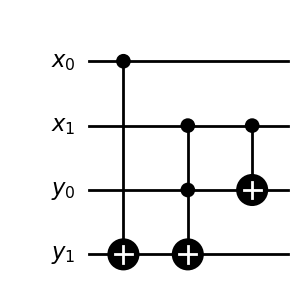

In [ ]:
quantum_register = QuantumRegister(size=2, name="x")
ancilla_register = AncillaRegister(size=2, name="y")

F_adder = QuantumCircuit(quantum_register, ancilla_register, name="F(x) adder")

F_adder.cx(quantum_register[0], ancilla_register[1])
F_adder.ccx(quantum_register[1], ancilla_register[0], ancilla_register[1])
F_adder.cx(quantum_register[1], ancilla_register[0])

F_adder.draw(output="mpl", style="bw")

Let us create the inverse to $F_{adder}$!

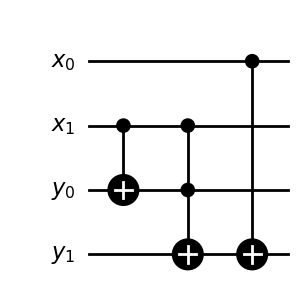

In [ ]:
quantum_register = QuantumRegister(size=2, name="x")
ancilla_register = AncillaRegister(size=2, name="y")

F_subtractor = QuantumCircuit(quantum_register, ancilla_register, name="F(x) subtractor")

### write the rest of the code below

F_subtractor.cx(quantum_register[1], ancilla_register[0])
F_subtractor.ccx(quantum_register[1], ancilla_register[0], ancilla_register[1])
F_subtractor.cx(quantum_register[0], ancilla_register[1])

###

F_subtractor.draw(output="mpl", style="bw")

### There is also a quicker way! 'F_subtractor' is the same as 'F_adder.inverse()'

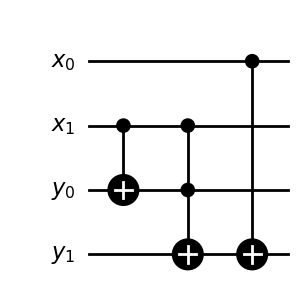

In [ ]:
F_adder.inverse().draw(output="mpl", style="bw")

In [ ]:
A = F_adder.to_gate()
Adg = F_subtractor.to_gate()

Let $\ket{t} = \ket{x_0 x_1}$ be such that $F(x_0, x_1) = 2$.

Use $A$ and $A^\dagger$ (without soliving for $(x_0, x_1) \in \mathbb{F}_2^2$) to create the marker oracle, $U$.

Note: 'circuit.compose(A, inplace=True)' applies the gate 'A' to 'circuit'

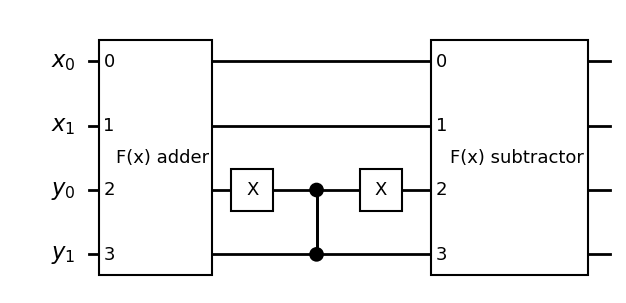

In [ ]:
quantum_register = QuantumRegister(size=2, name="x")
ancilla_register = AncillaRegister(size=2, name="y")

marker_circuit = QuantumCircuit(quantum_register, ancilla_register, name="marker")

### write the rest of the code below

marker_circuit.compose(A, inplace=True)

marker_circuit.x(ancilla_register[0])
marker_circuit.cz(ancilla_register[0], ancilla_register[1])
marker_circuit.x(ancilla_register[0])

marker_circuit.compose(Adg, inplace=True)

###

marker_circuit.draw(output="mpl", style="bw")

Can you simplify the the above circuit?

## State preparation.

Let $\ket{s} := \tfrac{1}{2} \left( \ket{00} + \ket{10} + \ket{01} + \ket{11} \right)$.

Let us create a circuit, $\mathrm{Prep}$, that creates this state, that is

$\mathrm{Prep} \ket{0} = \ket{s}$.

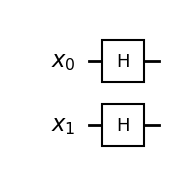

In [ ]:
quantum_register = QuantumRegister(size=2, name="x")

state_preparation_circuit = QuantumCircuit(quantum_register, name="State preparation")

state_preparation_circuit.h(quantum_register)

state_preparation_circuit.draw(output="mpl", style="bw")

In [ ]:
Prep = state_preparation_circuit.to_gate()

## Let's create the "diffuser" circtuit, $S$.

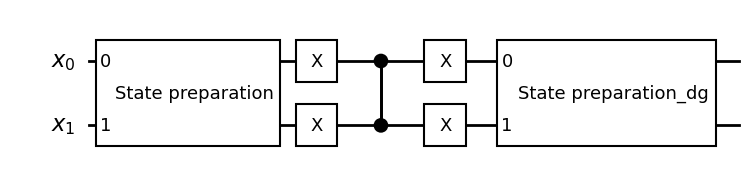

In [ ]:
quantum_register = QuantumRegister(size=2, name="x")

diffuser_circuit = QuantumCircuit(quantum_register, name="diffuser")

### write the rest of the code below

diffuser_circuit.compose(Prep, inplace=True)

diffuser_circuit.x(quantum_register)
diffuser_circuit.cz(quantum_register[0], quantum_register[1])
diffuser_circuit.x(quantum_register)

diffuser_circuit.compose(Prep.inverse(), inplace=True)

###

diffuser_circuit.draw(output="mpl", style="bw")

In [ ]:
U = marker_circuit.to_gate()
D = diffuser_circuit.to_gate()

What is the number of iteration, $K$, that you will need?

In [ ]:
N = 2**2
K = int(np.rint(np.pi / (4 * np.arcsin(1 / np.sqrt(N))) - 1/2))
K

1

# Full Grover circuit

Construct the full Grover search circuit and check the probabilities as the end.

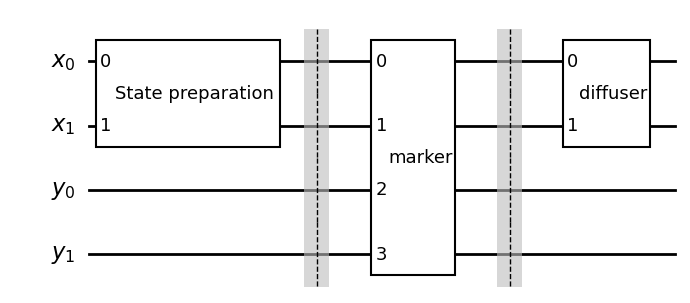

In [ ]:
### Delete this for the students' copy!!!

quantum_register = QuantumRegister(size=2, name="x")
ancilla_register = AncillaRegister(size=2, name="y")

grover_circuit = QuantumCircuit(quantum_register, ancilla_register, name="Grover circuit")

### write the rest of the code below

grover_circuit.compose(Prep, qubits=quantum_register[:], inplace=True)

for _ in range(1):
    grover_circuit.barrier()
    grover_circuit.compose(U, inplace=True)
    grover_circuit.barrier()
    grover_circuit.compose(D, qubits=quantum_register[:], inplace=True)

###

grover_circuit.draw(output="mpl", style="bw")

In [ ]:
psi = Statevector(grover_circuit)
psi.probabilities()

array([5.57706021e-34, 1.00000000e+00, 1.59557706e-68, 9.07105347e-35,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

Numerical noise makes it seem messy, so let's simplify:

In [ ]:
np.round(psi.probabilities(), 4)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Maximum probability at $\mathrm{index} = 1$, which is equivalent to $(x_0, x_1) = (1, 0)$, and $F (1, 0) = 2 \cdot 1 + 0 = 2$.

# Change in the probability density over the iterations

In [ ]:
n = 8
N = 2**n
K = int(np.rint(np.pi / (4 * np.arcsin(1 / np.sqrt(N))) - 1/2))
K

12

In [ ]:
quantum_register = QuantumRegister(size=n, name="x")

grover_circuit = QuantumCircuit(quantum_register, name="Grover circuit")

probabilities_over_time = np.zeros((4 * K, N))

### write the rest of the code below

grover_circuit.h(quantum_register)
for idx in range(probabilities_over_time.shape[0]):
    grover_circuit.mcp(np.pi, quantum_register[:-1], quantum_register[-1])
    grover_circuit.h(quantum_register)
    grover_circuit.x(quantum_register)
    grover_circuit.mcp(np.pi, quantum_register[:-1], quantum_register[-1])
    grover_circuit.x(quantum_register)
    grover_circuit.h(quantum_register)
    probabilities_over_time[idx] = Statevector(grover_circuit).probabilities()

###

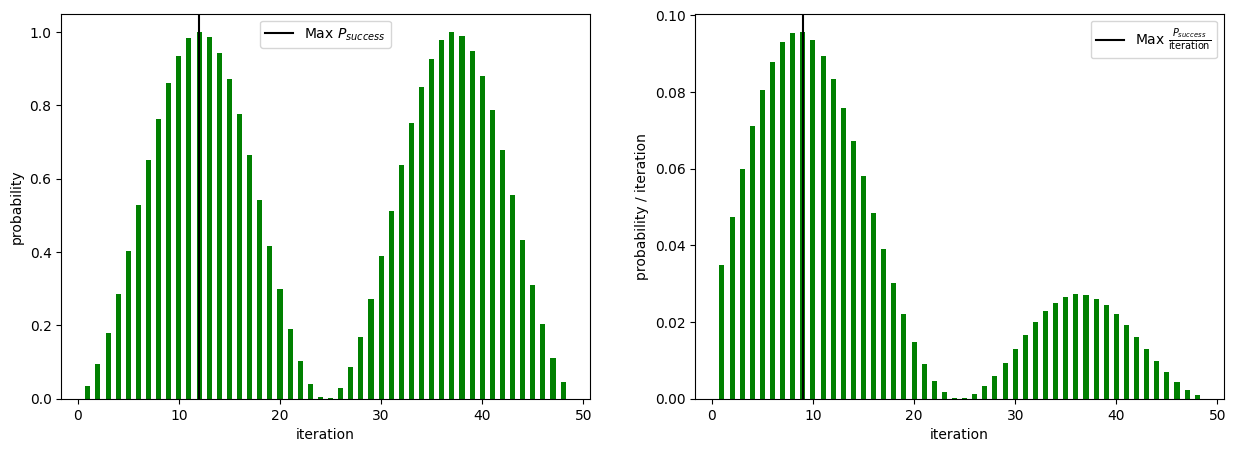

In [ ]:
iterations = np.arange(1, probabilities_over_time.shape[0] + 1)
P_success = probabilities_over_time.T[- 1]

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))

axs[0].bar(iterations,
           P_success,
           width=0.5,
           color="green")
axs[0].set(xlabel=f"iteration",
           ylabel=f"probability")
axs[0].axvline(x = iterations[np.argmax(P_success)],
               linewidth=1.5,
               color="black",
               label=r"Max $P_{success}$")

axs[0].legend(loc='best')

axs[1].bar(iterations,
           P_success / iterations,
           width=0.5,
           color="green")
axs[1].set(xlabel=f"iteration",
           ylabel=f"probability / iteration")
axs[1].axvline(x = iterations[np.argmax(P_success / iterations)],
               linewidth=1.5,
               color="black",
               label=r"Max $\frac{P_{success}}{\mathrm{iteration}}$")

axs[1].legend(loc='best')

plt.show()

# Quantum Fourier Transform

$n = 1$ case:

In [ ]:
n = 1

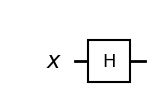

In [ ]:
quantum_register = QuantumRegister(size=n, name="x")

QFT_circuit = QuantumCircuit(quantum_register, name="QFT circuit")

QFT_circuit.h(quantum_register)

QFT_circuit.draw(output="mpl", style="bw")

$n = 2$ case:

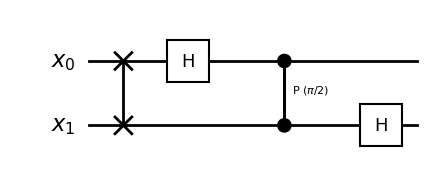

In [ ]:
n = 2

quantum_register = QuantumRegister(size=n, name="x")

QFT_circuit = QuantumCircuit(quantum_register, name="QFT circuit")

QFT_circuit.swap(quantum_register[0], quantum_register[1])

QFT_circuit.h(quantum_register[0])
QFT_circuit.cp(2 * np.pi / 2**2, quantum_register[0], quantum_register[1])
QFT_circuit.h(quantum_register[1])

QFT_circuit.draw(output="mpl", style="bw")

$n = 3$ case:

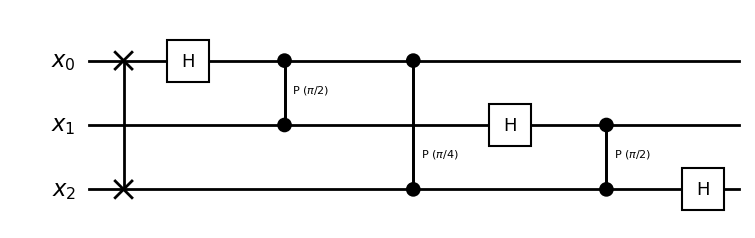

In [ ]:
n = 3

quantum_register = QuantumRegister(size=n, name="x")

QFT_circuit = QuantumCircuit(quantum_register, name="QFT circuit")

### Delete this for the students' copy!!!

QFT_circuit.swap(quantum_register[0], quantum_register[2])

QFT_circuit.h(quantum_register[0])
QFT_circuit.cp(2 * np.pi / 2**2, quantum_register[0], quantum_register[1])
QFT_circuit.cp(2 * np.pi / 2**3, quantum_register[0], quantum_register[2])
QFT_circuit.h(quantum_register[1])
QFT_circuit.cp(2 * np.pi / 2**2, quantum_register[1], quantum_register[2])
QFT_circuit.h(quantum_register[2])

###

QFT_circuit.draw(output="mpl", style="bw")

## Below is an exact implementation using only Hadamard, $CX$, $CP \left( \tfrac{\pi}{2^a} \right)$, and SWAP gates.

(Can you rewrite to only use Hadamard, $R_Z \left( \tfrac{\pi}{2^a} \right)$, and $CX$ gates?)

In [ ]:
def quantum_fourier_transform(n):
    quantum_register = QuantumRegister(size=n, name="x")
    QFT_circuit = QuantumCircuit(quantum_register, name=f"QFT")

    for q, p in zip(quantum_register[:n >> 1], reversed(quantum_register[n >> 1:])):
        QFT_circuit.swap(q, p)

    for i, q in enumerate(quantum_register, start=1):
        QFT_circuit.h(q)
        for j, p in enumerate(quantum_register[i:], start=1):
            QFT_circuit.cp(np.pi / (1 << j), q, p)

    return QFT_circuit

def inverse_quantum_fourier_transform(n):
    quantum_register = QuantumRegister(size=n, name="x")
    inverse_QFT_circuit = QuantumCircuit(quantum_register, name=f"IQFT")

    for i, q in enumerate(reversed(quantum_register), start=1):
        for j, p in enumerate(reversed(quantum_register[n + 1 - i:]), start=1):
            inverse_QFT_circuit.cp(- np.pi / (1 << (i - j)), q, p)
        inverse_QFT_circuit.h(q)

    for q, p in zip(quantum_register[:n >> 1], reversed(quantum_register[n >> 1:])):
        inverse_QFT_circuit.swap(q, p)

    return inverse_QFT_circuit

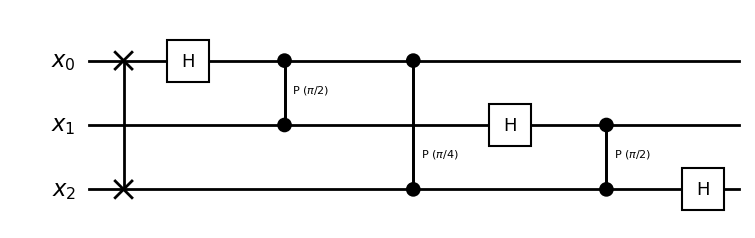

In [ ]:
quantum_fourier_transform(3).draw(output="mpl", style="bw")

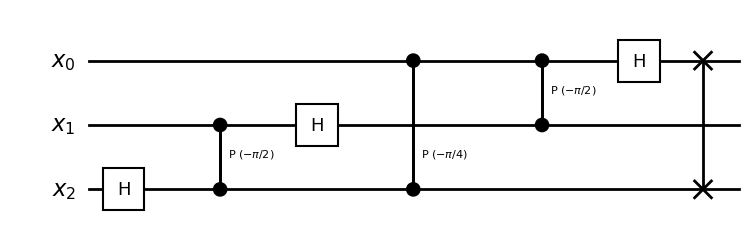

In [ ]:
inverse_quantum_fourier_transform(3).draw(output="mpl", style="bw")

# Draper's adder circuit

In [ ]:
def quantum_adder(k, n):
    quantum_register = QuantumRegister(size=n, name="x")
    quantum_adder_circuit = QuantumCircuit(quantum_register, name=f"{k} adder")

    quantum_adder_circuit.compose(quantum_fourier_transform(n), inplace=True)

    quantum_adder_circuit.barrier()

    # phaser part
    for idx, q in enumerate(reversed(quantum_register)):
        quantum_adder_circuit.p(np.pi * k / (1 << idx), q)

    quantum_adder_circuit.barrier()

    quantum_adder_circuit.compose(inverse_quantum_fourier_transform(n), inplace=True)

    return quantum_adder_circuit

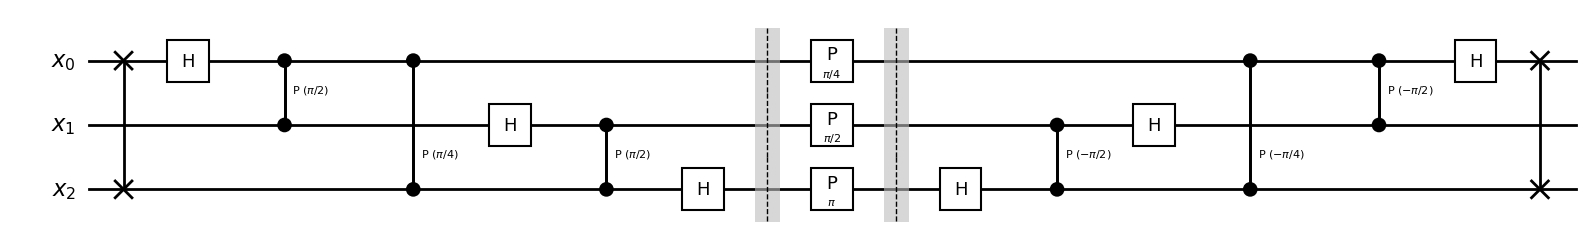

In [ ]:
quantum_adder(1, 3).draw(output="mpl", style="bw")

In [ ]:
O = Operator(quantum_adder(3, 3)).data
O

array([[ 4.29089154e-18+4.59242550e-17j,  0.00000000e+00+7.26199410e-17j,
         9.58689626e-18+5.98020428e-17j,  4.90653893e-17+6.12323400e-17j,
         8.75576184e-17+4.59242550e-17j,  1.00000000e+00-3.78781641e-16j,
        -1.01435406e-16+3.20464672e-17j, -4.90653893e-17+6.12323400e-17j],
       [-4.16333634e-17+7.22495334e-17j, -2.63388680e-17+4.30500710e-17j,
         0.00000000e+00+7.37968774e-17j,  6.71271230e-18+6.26762267e-17j,
         4.16333634e-17-1.10171934e-17j,  1.18187378e-16+4.87984389e-17j,
         1.00000000e+00-3.18726237e-16j, -9.85612222e-17+2.91722832e-17j],
       [-1.01435406e-16+5.98020428e-17j, -6.86915451e-17+1.00484651e-16j,
        -2.34646841e-17+4.59242550e-17j,  1.11022302e-16+6.16299268e-17j,
         9.58689626e-18+3.20464672e-17j,  6.86915451e-17+2.19800285e-17j,
         1.15313194e-16+4.59242550e-17j,  1.00000000e+00-3.67791627e-16j],
       [ 1.00000000e+00-2.48857756e-16j, -9.85612222e-17+2.91722832e-17j,
        -8.32667268e-17+2.86059436e

### Let's get rid of the noise to see that 'O' is indeed the matrix of shift-by-three.

In [ ]:
np.round(np.real(O)).astype(int)

array([[0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0]])